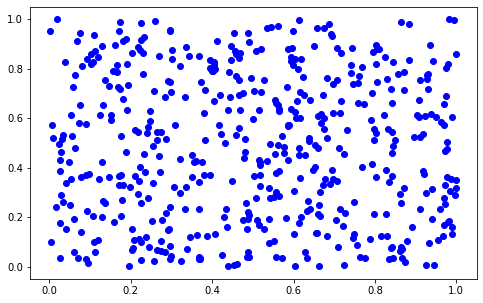

In [1]:
import numpy as np
import numpy.random as nprd
# 获取序贯的1000个均匀分布随机数
x = nprd.random(1000)
# 将1000个均匀分布随机数按照奇偶数分成两个序列x0 和x1
x0 = np.array([x[i] for i in range(1000) if i % 2 == 0])
x1 = np.array([x[i] for i in range(1000) if i % 2 == 1])
# 画图
import matplotlib.pyplot as plt
# 设定图像大小
plt.rcParams['figure.figsize'] = (8.0, 5.0)
plt.scatter(x0, x1, color='blue')  ## 画出散点图
plt.savefig("check_random_py.pdf")


2.109375


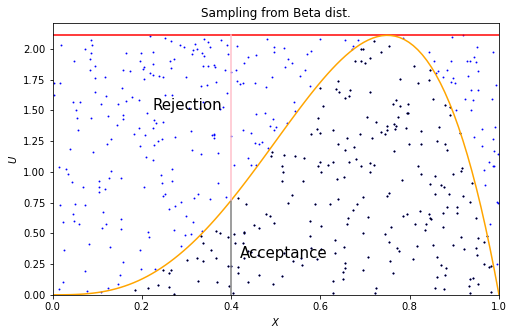

In [2]:
#!/usr/bin/python3
## file: rejection_beta.py
import numpy as np
import numpy.random as nprd
import scipy.special as scisp
# 设定参数
alpha = 4
beta = 2
# beta分布密度函数
f=lambda x: 1/scisp.beta(alpha,beta)* \
    x**(alpha-1) * (1-x)**(beta-1)
# 计算密度函数最大值
M = f((1 - alpha) / (2 - alpha - beta))
print(M)
# 随机抽两个均匀分布，一个为(0,1)，一个为(0,M)，抽500个
N = 500
x = nprd.random(N)
u = nprd.random(N) * M
# 挑出使得u<beta密度函数的x
accepted = [i for i in range(N) if u[i] <= f(x[i])]
rand_beta = x[accepted]  #生成的Beta分布随机数
rand_U_selected = u[accepted]
# 画图
import matplotlib.pyplot as plt
# 设定图像大小和坐标范围
plt.rcParams['figure.figsize'] = (8.0, 5.0)
plt.xlim(0, 1)
plt.ylim(0, M + 0.1)
# 横线和竖线
x_grid = np.linspace(0, 1, 100)  #(0,1)均匀的100个点
y_M = np.ones(100) * M
beta_dens = f(x_grid)
y1 = np.linspace(0, f(0.4), 20)
y2 = np.linspace(f(0.4), M, 20)
x_hline = np.ones(20) * 0.4
plt.xlabel(r'$X$')
plt.ylabel(r'$U$')
plt.title('Sampling from Beta dist.')  # 标题
## 画出散点图
plt.scatter(x, u, color='blue', s=0.8)
plt.scatter(rand_beta, rand_U_selected, color='black', s=0.8)
plt.plot(x_grid, y_M, color='red')  ## 最大值
plt.plot(x_grid, beta_dens, color='orange')  ## 密度函数
plt.plot(x_hline, y1, color='grey')  ## 接受区域
plt.text(0.42, 0.3, "Acceptance", fontsize=15, horizontalalignment="left")
plt.plot(x_hline, y2, color='pink')  ## 拒绝区域
plt.text(0.38, 1.5, "Rejection", fontsize=15, horizontalalignment="right")
plt.savefig("rejection_beta.pdf")
